<a href="https://colab.research.google.com/github/GloriaY007/Final-Group-Project-/blob/main/Final_Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies

In [ ]:
# Import AWS_Password file
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving AWS_Password.py to AWS_Password (2).py


In [ ]:
#Import the dependencies
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import psycopg2
from sklearn.preprocessing import StandardScaler
import AWS_Password
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Connect to Databases and Clean & Pre-Process the Data (Happiness, Freedom, Life Expectancy)

In [ ]:
#Connect Python to Postgres (Happiness Dataset)
import psycopg2
engine = psycopg2.connect(
    database="postgres",
    user="postgres",
    password=AWS_Password.password,
    host="happiness.c45odizugug2.us-east-2.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor()
try:
    cursor.execute("""Select * From "World_Happiness_2015_2016_Report";""")
except (Exception, psycopg2.DatabaseError) as error:
    print("Error: %s" % error)
    cursor.close()
    
# Naturally we get a list of tuples
tuples = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
cursor.close()
# We just need to turn it into a pandas dataframe
Happiness_Report_2015_2016_df = pd.DataFrame(tuples, columns=colnames)

In [ ]:
# View Happiness_Report_2015_2016_df
Happiness_Report_2015_2016_df

,index,country,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,year
0,1,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,2,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,3,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,4,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,5,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,312,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,313,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,314,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [ ]:
# Drop Index Column from Happiness dataframe
Happiness_Report_2015_2016_df = Happiness_Report_2015_2016_df.drop("index", axis=1)
Happiness_Report_2015_2016_df

,country,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [ ]:
# Remove NaNs from Happiness dataframe
Happiness_Report_2015_2016_df=Happiness_Report_2015_2016_df.dropna()
Happiness_Report_2015_2016_df

,country,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [ ]:
# Remove Duplicates from Happiness dataframe
Happiness_Report_2015_2016_df=Happiness_Report_2015_2016_df.drop_duplicates()
Happiness_Report_2015_2016_df

,country,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [ ]:
#Connect Python to Postgres (Freedom Dataset)
import psycopg2
engine = psycopg2.connect(
    database="postgres",
    user="postgres",
    password=AWS_Password.password,
    host="happiness.c45odizugug2.us-east-2.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor()
try:
    cursor.execute("""SELECT*FROM public."Human_Freedom_Index";""")
except (Exception, psycopg2.DatabaseError) as error:
    print("Error: %s" % error)
    cursor.close()
    
# Naturally we get a list of tuples
tuples = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
cursor.close()
# We just need to turn it into a pandas dataframe
Human_Freedom_Index_df = pd.DataFrame(tuples, columns=colnames)

In [ ]:
# View the Human Freedom Index dataframe
Human_Freedom_Index_df

,id,year,iso_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,...,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,1,2016,ALB,Albania,Eastern Europe,6.661502941,4.547243777,4.666508223,5.291751647,8.920429431,10.0,10.000000000,10.00,10.000000000,10.000000000,10.000000000,10.0,7.5,5.0,5.0,5.0,7.500000000,8.806809810,5.0,10.0,5.0,6.666666667,None,None,10.000000000,9.566666667,8.011111111,9.192592593,10.0,10.0,None,None,10.000000000,None,None,...,9.743600000,10.0,9.553657390,9.626666667,9.24,8.0240,8.963555556,5.574481487,9.405327776,7.489904631,10.000000000,6.306105852,4.615384615,8.296923099,6.406137855,8.214899510,5.0,7.295686921,9.0,7.098562307,5.566666667,5.396398703,6.234861215,8.0,6.299740913,10.0,6.916277916,6.072171528,6.000000000,9.713863752,4.050195972,7.324582113,7.074365792,6.705863193,6.906901139,7.54,34.0,7.568140288,48.0,2.0
1,2,2016,DZA,Algeria,Middle East & North Africa,None,None,None,3.819566026,9.456253595,10.0,9.294029701,5.00,9.926119387,9.990149252,8.842059668,10.0,7.5,0.0,0.0,0.0,5.833333333,8.043882199,5.0,5.0,5.0,5.000000000,None,None,5.000000000,6.873333333,2.961111111,4.944814815,5.0,5.0,None,None,5.000000000,None,None,...,8.720460000,5.0,7.253893581,8.480000000,6.22,5.9176,6.872533333,4.962588947,0E-9,2.481294473,5.563909774,3.664828738,0E-9,1.106256413,1.590361717,4.127024824,0.0,5.301525853,10.0,5.100508618,5.566666667,3.896911542,5.958321095,6.0,7.755176154,1.0,5.029512576,3.722341458,1.777777778,9.243069793,3.765515288,8.523503188,7.029528486,5.676955998,5.268992397,4.99,159.0,5.135886055,155.0,4.0
2,3,2016,AGO,Angola,Sub-Saharan Africa,None,None,None,3.451813885,8.060260239,5.0,10.000000000,7.50,10.000000000,10.000000000,8.500000000,10.0,10.0,5.0,5.0,5.0,8.333333333,8.297864524,0.0,5.0,10.0,5.000000000,None,None,10.000000000,8.904444444,7.455555556,8.786666667,2.5,2.5,None,None,2.500000000,None,None,...,3.054000000,5.0,5.606605364,8.993333333,7.72,4.2544,6.989244444,3.132738335,0.917159763,2.024949049,10.000000000,2.946919330,3.076923077,0.110625641,2.044822683,5.264754044,8.0,9.194715492,4.0,7.064905164,8.900000000,2.656197601,5.172987096,4.0,6.632764231,0.0,4.560324821,2.758427817,1.333333333,8.664627148,1.945540493,8.096775933,6.782923304,4.930271338,5.518500441,5.17,155.0,5.640662182,142.0,4.0
3,4,2016,ARG,Argentina,Latin America & the Caribbean,7.098483117,5.791960457,4.343929507,5.744791027,7.622974220,10.

In [ ]:
# Select columns to keep from the original Human_Freedom_Index csv
new_human_freedom_index_df = Human_Freedom_Index_df[["year", "countries", "pf_rol", "pf_ss", "pf_movement", "pf_religion", "pf_association", "pf_expression", "pf_identity", "pf_score", "ef_government", "ef_legal", "ef_money", "ef_trade", "ef_regulation", "ef_score", "hf_score"]]
new_human_freedom_index_df

,year,countries,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score
0,2016,Albania,5.291751647,8.806809810,6.666666667,9.192592593,10.000000000,8.607142857,6.250000000,7.596280576,7.935563809,5.071813726,9.553657390,8.214899510,6.906901139,7.54,7.568140288
1,2016,Algeria,3.819566026,8.043882199,5.000000000,4.944814815,5.000000000,7.380952381,0.833333333,5.281772109,3.616782254,4.690742835,7.253893581,4.127024824,5.268992397,4.99,5.135886055
2,2016,Angola,3.451813885,8.297864524,5.000000000,8.786666667,4.000000000,6.452380952,7.500000000,6.111324364,6.496684826,2.963635116,5.606605364,5.264754044,5.518500441,5.17,5.640662182
3,2016,Argentina,5.744791027,9.040383237,10.000000000,7.795925926,7.500000000,8.738095238,10.000000000,8.099695682,5.346056135,3.904030401,5.614335974,3.982546906,5.369018774,4.84,6.469847841
4,2016,Armenia,5.003205353,8.830548737,6.666666667,6.222222222,6.500000000,7.154761905,8.000000000,6.912803602,7.003309536,5.809214965,9.521939951,8.143241004,7.378068688,7.57,7.241401801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,Venezuela,3.100000000,6.665877012,8.333333333,7.848148148,5.583333333,6.778079218,10.000000000,6.295758656,4.842725196,2.705464235,5.296955522,3.611472215,4.666935504,4.22,5.257879328
1454,2008,Vietnam,5.600000000,9.498746366,5.000000000,6.409259259,2.750000000,4.598000988,10.000000000,6.650412616,7.400000000,6.073716608,5.253293702,5.906879173,6.307577197,6.19,6.420206308
1455,2008,"Yemen, Rep.",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1456,2008,Zambia,4.400000000,8.181583610,8.333333333,7.714814815,4.250000000,7.202380952,2.500000000,6.145448813,7.867647059,5.810978462,8.367633930,6.983402160,6.722174633,7.15,6.647724406


In [ ]:
#print(Human_Freedom_Index_df.isnull().sum().)
print(pd.DataFrame(new_human_freedom_index_df.isnull().sum()))

                  0
year              0
countries         0
pf_rol           80
pf_ss            80
pf_movement      80
pf_religion      90
pf_association  329
pf_expression    80
pf_identity      80
pf_score         80
ef_government    80
ef_legal         80
ef_money         82
ef_trade         81
ef_regulation    80
ef_score         80
hf_score         80


In [ ]:
# Remove NaNs from Human Freedom Index dataframe
new_human_freedom_index_df= (new_human_freedom_index_df.dropna())
new_human_freedom_index_df


,year,countries,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score
0,2016,Albania,5.291751647,8.806809810,6.666666667,9.192592593,10.000000000,8.607142857,6.250000000,7.596280576,7.935563809,5.071813726,9.553657390,8.214899510,6.906901139,7.54,7.568140288
1,2016,Algeria,3.819566026,8.043882199,5.000000000,4.944814815,5.000000000,7.380952381,0.833333333,5.281772109,3.616782254,4.690742835,7.253893581,4.127024824,5.268992397,4.99,5.135886055
2,2016,Angola,3.451813885,8.297864524,5.000000000,8.786666667,4.000000000,6.452380952,7.500000000,6.111324364,6.496684826,2.963635116,5.606605364,5.264754044,5.518500441,5.17,5.640662182
3,2016,Argentina,5.744791027,9.040383237,10.000000000,7.795925926,7.500000000,8.738095238,10.000000000,8.099695682,5.346056135,3.904030401,5.614335974,3.982546906,5.369018774,4.84,6.469847841
4,2016,Armenia,5.003205353,8.830548737,6.666666667,6.222222222,6.500000000,7.154761905,8.000000000,6.912803602,7.003309536,5.809214965,9.521939951,8.143241004,7.378068688,7.57,7.241401801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2008,Uruguay,6.400000000,9.120614313,10.000000000,9.657777778,10.000000000,9.297619048,10.000000000,8.775693261,7.315649543,5.623890096,8.447859234,8.055019795,6.162140043,7.12,7.947846630
1453,2008,Venezuela,3.100000000,6.665877012,8.333333333,7.848148148,5.583333333,6.778079218,10.000000000,6.295758656,4.842725196,2.705464235,5.296955522,3.611472215,4.666935504,4.22,5.257879328
1454,2008,Vietnam,5.600000000,9.498746366,5.000000000,6.409259259,2.750000000,4.598000988,10.000000000,6.650412616,7.400000000,6.073716608,5.253293702,5.906879173,6.307577197,6.19,6.420206308
1456,2008,Zambia,4.400000000,8.181583610,8.333333333,7.714814815,4.250000000,7.202380952,2.500000000,6.145448813,7.867647059,5.810978462,8.367633930,6.983402160,6.722174633,7.15,6.647724406


In [ ]:
# Remove duplicates from Human Freedom Index dataframe
new_human_freedom_index_df = new_human_freedom_index_df.drop_duplicates()
new_human_freedom_index_df


,year,countries,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score
0,2016,Albania,5.291751647,8.806809810,6.666666667,9.192592593,10.000000000,8.607142857,6.250000000,7.596280576,7.935563809,5.071813726,9.553657390,8.214899510,6.906901139,7.54,7.568140288
1,2016,Algeria,3.819566026,8.043882199,5.000000000,4.944814815,5.000000000,7.380952381,0.833333333,5.281772109,3.616782254,4.690742835,7.253893581,4.127024824,5.268992397,4.99,5.135886055
2,2016,Angola,3.451813885,8.297864524,5.000000000,8.786666667,4.000000000,6.452380952,7.500000000,6.111324364,6.496684826,2.963635116,5.606605364,5.264754044,5.518500441,5.17,5.640662182
3,2016,Argentina,5.744791027,9.040383237,10.000000000,7.795925926,7.500000000,8.738095238,10.000000000,8.099695682,5.346056135,3.904030401,5.614335974,3.982546906,5.369018774,4.84,6.469847841
4,2016,Armenia,5.003205353,8.830548737,6.666666667,6.222222222,6.500000000,7.154761905,8.000000000,6.912803602,7.003309536,5.809214965,9.521939951,8.143241004,7.378068688,7.57,7.241401801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2008,Uruguay,6.400000000,9.120614313,10.000000000,9.657777778,10.000000000,9.297619048,10.000000000,8.775693261,7.315649543,5.623890096,8.447859234,8.055019795,6.162140043,7.12,7.947846630
1453,2008,Venezuela,3.100000000,6.665877012,8.333333333,7.848148148,5.583333333,6.778079218,10.000000000,6.295758656,4.842725196,2.705464235,5.296955522,3.611472215,4.666935504,4.22,5.257879328
1454,2008,Vietnam,5.600000000,9.498746366,5.000000000,6.409259259,2.750000000,4.598000988,10.000000000,6.650412616,7.400000000,6.073716608,5.253293702,5.906879173,6.307577197,6.19,6.420206308
1456,2008,Zambia,4.400000000,8.181583610,8.333333333,7.714814815,4.250000000,7.202380952,2.500000000,6.145448813,7.867647059,5.810978462,8.367633930,6.983402160,6.722174633,7.15,6.647724406


In [ ]:
#merge _happiness & freedom
merge_happiness_freedom=pd.merge(new_human_freedom_index_df, Happiness_Report_2015_2016_df, left_on=["countries", "year"], right_on=["country", "year"] )
merge_happiness_freedom

,year,countries,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,country,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,2016,Albania,5.291751647,8.806809810,6.666666667,9.192592593,10.000000000,8.607142857,6.250000000,7.596280576,7.935563809,5.071813726,9.553657390,8.214899510,6.906901139,7.54,7.568140288,Albania,Central and Eastern Europe,109,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
1,2016,Algeria,3.819566026,8.043882199,5.000000000,4.944814815,5.000000000,7.380952381,0.833333333,5.281772109,3.616782254,4.690742835,7.253893581,4.127024824,5.268992397,4.99,5.135886055,Algeria,Middle East and Northern Africa,38,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
2,2016,Angola,3.451813885,8.297864524,5.000000000,8.786666667,4.000000000,6.452380952,7.500000000,6.111324364,6.496684826,2.963635116,5.606605364,5.264754044,5.518500441,5.17,5.640662182,Angola,Sub-Saharan Africa,141,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
3,2016,Argentina,5.744791027,9.040383237,10.000000000,7.795925926,7.500000000,8.738095238,10.000000000,8.099695682,5.346056135,3.904030401,5.614335974,3.982546906,5.369018774,4.84,6.469847841,Argentina,Latin America and Caribbean,26,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
4,2016,Armenia,5.003205353,8.830548737,6.666666667,6.222222222,6.500000000,7.154761905,8.000000000,6.912803602,7.003309536,5.809214965,9.521939951,8.143241004,7.378068688,7.57,7.241401801,Armenia,Central and Eastern Europe,121,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2015,United States,7.132165883,9.328352893,10.000000000,8.606296296,10.000000000,9.268106616,9.250000000,8.827569985,6.402068976,7.226306260,9.761051292,7.535949024,8.713321959,7.93,8.378784993,United States,North America,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
245,2015,Uruguay,6.965991287,8.305989697,10.000000000,8.905555556,7.500000000,9.321428571,10.000000000,8.390693659,6.898378225,5.501567589,9.078882104,7.837795013,6.430508577,7.15,7.770346829,Uruguay,Latin America and Caribbean,32,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
246,2015,Venezuela,1.816299622,6.332620057,8.333333333,7.338888889,6.500000000,5.190476190,7.500000000,5.523499761,4.939784020,2.046750013,1.942101065,3.323736749,2.564401113,2.96,4.241749880,Venezuela,Latin America and Caribbean,23,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
247,2015,Vietnam,5.165162475,8.630880895,3.333333333,5.703703704,1.500000000,5.872682796,9.250000000,6.014982826,7.629411765,5.021324429,6.177432425,6.018601176,6.638954149,6.30,6.157491413,Vietnam,Southeastern Asia,75,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173


In [ ]:
# Value counts
merge_happiness_freedom["year"].value_counts()

2016    126
2015    123
Name: year, dtype: int64

In [ ]:
#Connect Python to Postgres (Life Expectancy Data)
import psycopg2
engine = psycopg2.connect(
    database="postgres",
    user="postgres",
    password=AWS_Password.password,
    host="happiness.c45odizugug2.us-east-2.rds.amazonaws.com",
    port='5432'
)
cursor = engine.cursor()
try:
    cursor.execute("""SELECT *
FROM public."Life_Expectancy";""")
except (Exception, psycopg2.DatabaseError) as error:
    print("Error: %s" % error)
    cursor.close()
    
# Naturally we get a list of tuples
tuples = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
cursor.close()
# We just need to turn it into a pandas dataframe
Life_Expectancy_df = pd.DataFrame(tuples, columns=colnames)

In [ ]:
# View life expectancy dataframe
Life_Expectancy_df

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.66200000,66.07400000,66.44400000,66.78700000,67.11300000,67.43500000,67.76200000,68.09500000,68.43600000,68.78400000,69.14000000,69.49800000,69.85100000,70.19100000,70.51900000,70.83300000,71.14000000,71.44100000,71.73600000,72.02300000,72.29300000,72.53800000,72.75100000,72.92900000,73.07100000,73.18100000,73.26200000,73.32500000,73.37800000,73.42500000,73.46800000,73.50900000,73.54400000,73.57300000,73.59800000,73.62200000,73.64600000,73.67100000,73.70000000,73.73800000,73.78700000,73.85300000,73.93700000,74.03800000,74.15600000,74.28700000,74.42900000,74.57600000,74.72500000,74.87200000,75.01700000,75.15800000,75.29900000,75.44100000,75.58300000,75.72500000,75.86800000,76.01000000,76.15200000,None,None
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.44600000,32.96200000,33.47100000,33.97100000,34.46300000,34.94800000,35.43000000,35.91400000,36.40300000,36.90000000,37.40900000,37.93000000,38.46100000,39.00300000,39.55800000,40.12800000,40.71500000,41.32000000,41.94400000,42.58500000,43.24400000,43.92300000,44.61700000,45.32400000,46.04000000,46.76100000,47.48600000,48.21100000,48.93000000,49.64000000,50.33100000,50.99900000,51.64100000,52.25600000,52.84200000,53.39800000,53.92400000,54.42400000,54.90600000,55.37600000,55.84100000,56.30800000,56.78400000,57.27100000,57.77200000,58.29000000,58.82600000,59.37500000,59.93000000,60.48400000,61.02800000,61.55300000,62.05400000,62.52500000,62.96600000,63.37700000,63.76300000,64.13000000,64.48600000,None,None
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.52400000,37.81100000,38.11300000,38.43000000,38.76000000,39.10200000,39.45400000,39.81300000,40.17800000,40.54600000,40.91400000,41.28200000,41.65000000,42.01600000,42.37400000,42.72100000,43.05300000,43.36700000,43.66000000,43.93100000,44.17800000,44.40400000,44.61100000,44.79900000,44.96600000,45.10700000,45.21300000,45.28300000,45.31700000,45.32400000,45.30600000,45.27100000,45.23000000,45.20100000,45.20100000,45.24600000,45.35000000,45.51900000,45.76300000,46.09300000,46.52200000,47.05900000,47.70200000,48.44000000,49.26300000,50.16500000,51.14300000,52.17700000,53.24300000,54.31100000,55.35000000,56.33000000,57.23600000,58.05400000,58.77600000,59.39800000,59.92500000,60.37900000,60.78200000,None,None
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.28300000,63.30100000,64.19000000,64.91400000,65.46300000,65.85000000,66.11000000,66.30400000,66.48700000,66.68900000,66.93500000,67.23700000,67.58200000,67.95300000,68.34300000,68.73600000,69.11000000,69.44800000,69.74200000,69.99100000,70.20800000,70.41600000,70.63500000,70.87600000,71.13400000,71.38800000,71.60500000,71.76000000,71.84300000,71.86000000,71.83600000,71.80300000,71.80200000,71.86000000,71.99200000,72.20500000,72.49500000,72.83800000,73.20800000,73.58700000,73.95500000,74.28800000,74.57900000,74.82800000,75.03900000,75.22800000,75.42300000,75.64600000,75.91200000,76.22100000,76.56200000,76.91400000,77.25200000,77.55400000,77.81300000,78.02500000,78.19400000,78.33300000,78.45800000,None,None
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# Create a new Life_expectancy table
new_life_expectancy_df = pd.DataFrame(columns=["Country_Name", "Life_Expectancy", "year"])
for year in range (2015, 2017):
    lifeexp_df = Life_Expectancy_df[["Country_Name", str(year)]]
    lifeexp_df=  lifeexp_df.dropna()
    lifeexp_df=  lifeexp_df.rename(columns={str(year): "Life_Expectancy"})
    lifeexp_df['year'] = year
    new_life_expectancy_df=pd.concat([new_life_expectancy_df, lifeexp_df])
    
new_life_expectancy_df


,Country_Name,Life_Expectancy,year
0,Aruba,75.72500000,2015
1,Afghanistan,63.37700000,2015
2,Angola,59.39800000,2015
3,Albania,78.02500000,2015
5,Arab World,71.24957141,2015
...,...,...,...
259,Kosovo,71.64634146,2016
260,"Yemen, Rep.",66.08700000,2016
261,South Africa,63.15300000,2016
262,Zambia,62.46400000,2016


In [ ]:
# Check null values of new_life_expectancy_df
new_life_expectancy_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
5      0
      ..
259    0
260    0
261    0
262    0
263    0
Length: 494, dtype: int64

In [ ]:
# Remove NaNs from Human Freedom Index dataframe
new_life_expectancy_df=new_life_expectancy_df.dropna()
new_life_expectancy_df


,Country_Name,Life_Expectancy,year
0,Aruba,75.72500000,2015
1,Afghanistan,63.37700000,2015
2,Angola,59.39800000,2015
3,Albania,78.02500000,2015
5,Arab World,71.24957141,2015
...,...,...,...
259,Kosovo,71.64634146,2016
260,"Yemen, Rep.",66.08700000,2016
261,South Africa,63.15300000,2016
262,Zambia,62.46400000,2016


In [ ]:
# Drop duplicates from Human Freedom Index dataframe
new_life_expectancy_df=new_life_expectancy_df.drop_duplicates()
new_life_expectancy_df


,Country_Name,Life_Expectancy,year
0,Aruba,75.72500000,2015
1,Afghanistan,63.37700000,2015
2,Angola,59.39800000,2015
3,Albania,78.02500000,2015
5,Arab World,71.24957141,2015
...,...,...,...
259,Kosovo,71.64634146,2016
260,"Yemen, Rep.",66.08700000,2016
261,South Africa,63.15300000,2016
262,Zambia,62.46400000,2016


In [ ]:
# Merge all dataframes (Life Expectancy, Happiness, Freedom)
final_merge = pd.merge(new_life_expectancy_df,merge_happiness_freedom, left_on=["Country_Name", "year"], right_on=["countries", "year"] )
final_merge

,Country_Name,Life_Expectancy,year,countries,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,country,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Angola,59.39800000,2015,Angola,3.512106161,8.297864524,5.000000000,8.757037037,4.000000000,6.547619048,7.500000000,6.132958280,6.155508356,2.960263718,6.885464760,5.143997963,6.065583361,5.44,5.786479140,Angola,Sub-Saharan Africa,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
1,Albania,78.02500000,2015,Albania,5.164786073,8.865642363,6.666666667,9.235185185,10.000000000,8.642857143,6.250000000,7.587078008,7.923799103,5.003488819,9.585625237,8.112451744,7.035654872,7.53,7.558539004,Albania,Central and Eastern Europe,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,United Arab Emirates,77.28500000,2015,United Arab Emirates,6.333748881,8.023720505,3.333333333,5.124074074,0.500000000,6.153469156,0E-9,5.100455003,6.729955528,5.976645951,8.417219268,8.220144361,7.918170325,7.45,6.275227501,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
3,Argentina,76.06800000,2015,Argentina,5.535099829,8.962107772,10.000000000,7.888888889,7.500000000,8.619047619,10.000000000,8.025095551,5.333556135,3.816361620,6.455330731,3.730787481,5.549339485,4.98,6.502547776,Argentina,Latin America and Caribbean,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,Armenia,74.46700000,2015,Armenia,4.679989714,8.930382953,6.666666667,6.370370370,6.500000000,7.154761905,8.000000000,6.871773061,7.070956595,5.777803721,9.481225478,8.242619487,7.364916892,7.59,7.230886530,Armenia,Central and Eastern Europe,127,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Uruguay,77.49800000,2016,Uruguay,6.641640406,8.408217822,10.000000000,8.479629630,7.500000000,9.357142857,10.000000000,8.296141806,6.839554695,5.362794124,8.971845842,7.793198184,6.815292504,7.16,7.728070903,Uruguay,Latin America and Caribbean,29,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139
230,United States,78.53902439,2016,United States,6.949911658,9.101098169,10.000000000,8.854074074,10.000000000,9.241503522,9.250000000,8.747310216,6.426333682,7.396209007,9.847874250,7.653328354,8.827599714,8.03,8.388655108,United States,North America,13,7.104,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
231,Vietnam,75.17200000,2016,Vietnam,4.912071090,8.630880895,3.333333333,5.895925926,1.500000000,5.843436781,9.250000000,5.968007600,7.607352941,5.060821486,6.468943360,6.276207440,6.701358455,6.42,6.194003800,Vietnam,Southeastern Asia,96,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
232,South Africa,63.15300000,2016,South Africa,5.728137568,6.044606200,10.000000000,9.364814815,10.000000000,8.904761905,9.250000000,7.695143614,6.043834210,5.185801311,8.081938440,6.777461423,7.168277200,6.65,7.172571807,South Africa,Sub-Saharan Africa,116,4.459,1.02416,0.96053,0.18611,0.42483,0.08415,0.13656,1.64227


In [ ]:
#Compare the countries columns
final_merge[["Country_Name", "countries", "country"]]

,Country_Name,countries,country
0,Angola,Angola,Angola
1,Albania,Albania,Albania
2,United Arab Emirates,United Arab Emirates,United Arab Emirates
3,Argentina,Argentina,Argentina
4,Armenia,Armenia,Armenia
...,...,...,...
229,Uruguay,Uruguay,Uruguay
230,United States,United States,United States
231,Vietnam,Vietnam,Vietnam
232,South Africa,South Africa,South Africa


In [ ]:
#Drop countries and country columns
final_merge=final_merge.drop(["countries", "country"], axis=1)
final_merge

,Country_Name,Life_Expectancy,year,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,region,happiness_rank,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Angola,59.39800000,2015,3.512106161,8.297864524,5.000000000,8.757037037,4.000000000,6.547619048,7.500000000,6.132958280,6.155508356,2.960263718,6.885464760,5.143997963,6.065583361,5.44,5.786479140,Sub-Saharan Africa,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
1,Albania,78.02500000,2015,5.164786073,8.865642363,6.666666667,9.235185185,10.000000000,8.642857143,6.250000000,7.587078008,7.923799103,5.003488819,9.585625237,8.112451744,7.035654872,7.53,7.558539004,Central and Eastern Europe,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,United Arab Emirates,77.28500000,2015,6.333748881,8.023720505,3.333333333,5.124074074,0.500000000,6.153469156,0E-9,5.100455003,6.729955528,5.976645951,8.417219268,8.220144361,7.918170325,7.45,6.275227501,Middle East and Northern Africa,20,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
3,Argentina,76.06800000,2015,5.535099829,8.962107772,10.000000000,7.888888889,7.500000000,8.619047619,10.000000000,8.025095551,5.333556135,3.816361620,6.455330731,3.730787481,5.549339485,4.98,6.502547776,Latin America and Caribbean,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,Armenia,74.46700000,2015,4.679989714,8.930382953,6.666666667,6.370370370,6.500000000,7.154761905,8.000000000,6.871773061,7.070956595,5.777803721,9.481225478,8.242619487,7.364916892,7.59,7.230886530,Central and Eastern Europe,127,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Uruguay,77.49800000,2016,6.641640406,8.408217822,10.000000000,8.479629630,7.500000000,9.357142857,10.000000000,8.296141806,6.839554695,5.362794124,8.971845842,7.793198184,6.815292504,7.16,7.728070903,Latin America and Caribbean,29,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139
230,United States,78.53902439,2016,6.949911658,9.101098169,10.000000000,8.854074074,10.000000000,9.241503522,9.250000000,8.747310216,6.426333682,7.396209007,9.847874250,7.653328354,8.827599714,8.03,8.388655108,North America,13,7.104,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
231,Vietnam,75.17200000,2016,4.912071090,8.630880895,3.333333333,5.895925926,1.500000000,5.843436781,9.250000000,5.968007600,7.607352941,5.060821486,6.468943360,6.276207440,6.701358455,6.42,6.194003800,Southeastern Asia,96,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
232,South Africa,63.15300000,2016,5.728137568,6.044606200,10.000000000,9.364814815,10.000000000,8.904761905,9.250000000,7.695143614,6.043834210,5.185801311,8.081938440,6.777461423,7.168277200,6.65,7.172571807,Sub-Saharan Africa,116,4.459,1.02416,0.96053,0.18611,0.42483,0.08415,0.13656,1.64227


In [ ]:
# Columns from final_merge
final_merge.columns

Index(['Country_Name', 'Life_Expectancy', 'year', 'pf_rol', 'pf_ss',
       'pf_movement', 'pf_religion', 'pf_association', 'pf_expression',
       'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 'ef_money',
       'ef_trade', 'ef_regulation', 'ef_score', 'hf_score', 'region',
       'happiness_rank', 'happiness_score', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual'],
      dtype='object')

In [ ]:
# Datatypes from final_merge
final_merge.dtypes

Country_Name                   object
Life_Expectancy                object
year                           object
pf_rol                         object
pf_ss                          object
pf_movement                    object
pf_religion                    object
pf_association                 object
pf_expression                  object
pf_identity                    object
pf_score                       object
ef_government                  object
ef_legal                       object
ef_money                       object
ef_trade                       object
ef_regulation                  object
ef_score                       object
hf_score                       object
region                         object
happiness_rank                  int64
happiness_score                object
economy_gdp_per_capita         object
family                         object
health_life_expectancy         object
freedom                        object
trust_government_corruption    object
generosity  

In [ ]:
# Final merge correlation
final_merge.corr()

,happiness_rank
happiness_rank,1.0


In [ ]:
# Change the data types of everything except Happiness Rank, Country_Name, and region to float
changed_columns = final_merge[['Life_Expectancy', 'year', 'pf_rol', 'pf_ss',
       'pf_movement', 'pf_religion', 'pf_association', 'pf_expression',
       'pf_identity', 'pf_score', 'ef_government', 'ef_legal', 'ef_money',
       'ef_trade', 'ef_regulation', 'ef_score', 'hf_score', 'happiness_score', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual']].astype('float')
changed_columns

,Life_Expectancy,year,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,59.398000,2015.0,3.512106,8.297865,5.000000,8.757037,4.0,6.547619,7.500000,6.132958,6.155508,2.960264,6.885465,5.143998,6.065583,5.44,5.786479,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
1,78.025000,2015.0,5.164786,8.865642,6.666667,9.235185,10.0,8.642857,6.250000,7.587078,7.923799,5.003489,9.585625,8.112452,7.035655,7.53,7.558539,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,77.285000,2015.0,6.333749,8.023721,3.333333,5.124074,0.5,6.153469,0.000000,5.100455,6.729956,5.976646,8.417219,8.220144,7.918170,7.45,6.275228,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
3,76.068000,2015.0,5.535100,8.962108,10.000000,7.888889,7.5,8.619048,10.000000,8.025096,5.333556,3.816362,6.455331,3.730787,5.549339,4.98,6.502548,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,74.467000,2015.0,4.679990,8.930383,6.666667,6.370370,6.5,7.154762,8.000000,6.871773,7.070957,5.777804,9.481225,8.242619,7.364917,7.59,7.230887,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,77.498000,2016.0,6.641640,8.408218,10.000000,8.479630,7.5,9.357143,10.000000,8.296142,6.839555,5.362794,8.971846,7.793198,6.815293,7.16,7.728071,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139
230,78.539024,2016.0,6.949912,9.101098,10.000000,8.854074,10.0,9.241504,9.250000,8.747310,6.426334,7.396209,9.847874,7.653328,8.827600,8.03,8.388655,7.104,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
231,75.172000,2016.0,4.912071,8.630881,3.333333,5.895926,1.5,5.843437,9.250000,5.968008,7.607353,5.060821,6.468943,6.276207,6.701358,6.42,6.194004,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
232,63.153000,2016.0,5.728138,6.044606,10.000000,9.364815,10.0,8.904762,9.250000,7.695144,6.043834,5.185801,8.081938,6.777461,7.168277,6.65,7.172572,4.459,1.02416,0.96053,0.18611,0.42483,0.08415,0.13656,1.64227


In [ ]:
# Changed_Columns correlation matrix
changed_columns.corr()

,Life_Expectancy,year,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
Life_Expectancy,1.000000,0.012292,0.727544,0.640778,0.364658,0.044468,0.339514,0.420398,0.362988,0.616806,-0.284258,0.726150,0.575061,0.657513,0.456831,0.645954,0.680387,0.794490,0.835380,0.563105,0.962629,0.435156,0.339066,0.105420,0.199944
year,0.012292,1.000000,-0.030154,-0.005078,-0.020850,-0.092618,-0.003122,-0.008003,-0.016224,-0.028026,0.028355,-0.015281,-0.022777,-0.021902,0.017443,-0.006103,-0.021652,-0.010496,0.132622,-0.355604,-0.192905,-0.215112,-0.024495,0.003135,0.204056
pf_rol,0.727544,-0.030154,1.000000,0.702022,0.424089,0.259194,0.485373,0.612092,0.442442,0.807327,-0.441250,0.908874,0.544894,0.662661,0.685562,0.709638,0.836419,0.707098,0.758767,0.588106,0.714669,0.490902,0.517491,0.180852,0.082465
pf_ss,0.640778,-0.005078,0.702022,1.000000,0.396209,0.161142,0.336036,0.489374,0.544926,0.756766,-0.318006,0.710390,0.479865,0.592220,0.515594,0.595526,0.756276,0.434462,0.523876,0.356278,0.626877,0.327176,0.250822,0.206873,-0.083246
pf_movement,0.364658,-0.020850,0.424089,0.396209,1.000000,0.519570,0.612245,0.642878,0.616456,0.760495,-0.095692,0.405371,0.438039,0.532969,0.265202,0.463195,0.706103,0.341226,0.236239,0.365817,0.369673,0.219674,0.014530,0.035348,0.155081
pf_religion,0.044468,-0.092618,0.259194,0.161142,0.519570,1.000000,0.670200,0.612068,0.389030,0.580337,-0.001727,0.140885,0.281700,0.288304,0.172842,0.255712,0.499878,0.081250,0.007398,0.213645,0.060640,0.174518,-0.060163,0.096687,-0.021007
pf_association,0.339514,-0.003122,0.485373,0.336036,0.612245,0.670200,1.000000,0.838853,0.458863,0.770448,-0.109068,0.355585,0.442043,0.466206,0.333084,0.437739,0.702785,0.303976,0.276348,0.231475,0.340524,0.126312,-0.076886,0.165115,0.139020
pf_expression,0.420398,-0.008003,0.612092,0.489374,0.642878,0.612068,0.838853,1.000000,0.493443,0.837111,-0.172004,0.504817,0.447009,0.503487,0.364849,0.494366,0.771065,0.412605,0.378555,0.361325,0.418779,0.291673,0.052046,0.216625,0.113480
pf_identity,0.362988,-0.016224,0.442442,0.544926,0.616456,0.389030,0.458863,0.493443,1.000000,0.755435,-0.187227,0.428963,0.361929,0.499451,0.312505,0.421930,0.686189,0.304637,0.217246,0.320668,0.377928,0.205255,-0.016106,0.019898,0.123784
pf_score,0.616806,-0.028026,0.807327,0.756766,0.760495,0.580337,0.770448,0.837111,0.755435,1.000000,-0.298651,0.728916,0.584819,0.702626,0.552767,0.678697,0.956222,0.541931,0.524674,0.491205,0.615488,0.374695,0.193940,0.175608,0.093793


In [ ]:
# Correlation for Happiness Score
changed_columns.corr()["happiness_score"]

Life_Expectancy                0.794490
year                          -0.010496
pf_rol                         0.707098
pf_ss                          0.434462
pf_movement                    0.341226
pf_religion                    0.081250
pf_association                 0.303976
pf_expression                  0.412605
pf_identity                    0.304637
pf_score                       0.541931
ef_government                 -0.296042
ef_legal                       0.665595
ef_money                       0.477248
ef_trade                       0.520636
ef_regulation                  0.390684
ef_score                       0.537179
hf_score                       0.585696
happiness_score                1.000000
economy_gdp_per_capita         0.809331
family                         0.691956
health_life_expectancy         0.773287
freedom                        0.581714
trust_government_corruption    0.474794
generosity                     0.245756
dystopia_residual              0.574427


In [ ]:
# Df for 2015
year_2015 = changed_columns.loc[changed_columns["year"]==2015]
year_2015

,Life_Expectancy,year,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,59.398000,2015.0,3.512106,8.297865,5.000000,8.757037,4.0,6.547619,7.500000,6.132958,6.155508,2.960264,6.885465,5.143998,6.065583,5.44,5.786479,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
1,78.025000,2015.0,5.164786,8.865642,6.666667,9.235185,10.0,8.642857,6.250000,7.587078,7.923799,5.003489,9.585625,8.112452,7.035655,7.53,7.558539,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,77.285000,2015.0,6.333749,8.023721,3.333333,5.124074,0.5,6.153469,0.000000,5.100455,6.729956,5.976646,8.417219,8.220144,7.918170,7.45,6.275228,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
3,76.068000,2015.0,5.535100,8.962108,10.000000,7.888889,7.5,8.619048,10.000000,8.025096,5.333556,3.816362,6.455331,3.730787,5.549339,4.98,6.502548,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,74.467000,2015.0,4.679990,8.930383,6.666667,6.370370,6.5,7.154762,8.000000,6.871773,7.070957,5.777804,9.481225,8.242619,7.364917,7.59,7.230887,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,77.369000,2015.0,6.965991,8.305990,10.000000,8.905556,7.5,9.321429,10.000000,8.390694,6.898378,5.501568,9.078882,7.837795,6.430509,7.15,7.770347,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
112,78.690244,2015.0,7.132166,9.328353,10.000000,8.606296,10.0,9.268107,9.250000,8.827570,6.402069,7.226306,9.761051,7.535949,8.713322,7.93,8.378785,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
113,75.110000,2015.0,5.165162,8.630881,3.333333,5.703704,1.5,5.872683,9.250000,6.014983,7.629412,5.021324,6.177432,6.018601,6.638954,6.30,6.157491,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
114,62.649000,2015.0,5.665023,6.047035,10.000000,9.237407,10.0,8.964286,9.250000,7.673184,6.060746,5.762888,8.101294,6.871227,7.400876,6.84,7.256592,4.642,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956


2015 Dataframe

In [ ]:
# Drop 'year' for year_2015 df
year_2015 = year_2015.drop(["year"], axis=1)
year_2015

,Life_Expectancy,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,59.398000,3.512106,8.297865,5.000000,8.757037,4.0,6.547619,7.500000,6.132958,6.155508,2.960264,6.885465,5.143998,6.065583,5.44,5.786479,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
1,78.025000,5.164786,8.865642,6.666667,9.235185,10.0,8.642857,6.250000,7.587078,7.923799,5.003489,9.585625,8.112452,7.035655,7.53,7.558539,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,77.285000,6.333749,8.023721,3.333333,5.124074,0.5,6.153469,0.000000,5.100455,6.729956,5.976646,8.417219,8.220144,7.918170,7.45,6.275228,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
3,76.068000,5.535100,8.962108,10.000000,7.888889,7.5,8.619048,10.000000,8.025096,5.333556,3.816362,6.455331,3.730787,5.549339,4.98,6.502548,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
4,74.467000,4.679990,8.930383,6.666667,6.370370,6.5,7.154762,8.000000,6.871773,7.070957,5.777804,9.481225,8.242619,7.364917,7.59,7.230887,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,77.369000,6.965991,8.305990,10.000000,8.905556,7.5,9.321429,10.000000,8.390694,6.898378,5.501568,9.078882,7.837795,6.430509,7.15,7.770347,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
112,78.690244,7.132166,9.328353,10.000000,8.606296,10.0,9.268107,9.250000,8.827570,6.402069,7.226306,9.761051,7.535949,8.713322,7.93,8.378785,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
113,75.110000,5.165162,8.630881,3.333333,5.703704,1.5,5.872683,9.250000,6.014983,7.629412,5.021324,6.177432,6.018601,6.638954,6.30,6.157491,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
114,62.649000,5.665023,6.047035,10.000000,9.237407,10.0,8.964286,9.250000,7.673184,6.060746,5.762888,8.101294,6.871227,7.400876,6.84,7.256592,4.642,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956


In [ ]:
# Df for 2016
year_2016 = changed_columns.loc[changed_columns["year"]==2016]
year_2016

,Life_Expectancy,year,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
116,59.925000,2016.0,3.451814,8.297865,5.000000,8.786667,4.0,6.452381,7.500000,6.111324,6.496685,2.963635,5.606605,5.264754,5.518500,5.17,5.640662,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
117,78.194000,2016.0,5.291752,8.806810,6.666667,9.192593,10.0,8.607143,6.250000,7.596281,7.935564,5.071814,9.553657,8.214900,6.906901,7.54,7.568140,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
118,77.470000,2016.0,6.365951,7.991936,3.333333,4.695926,0.5,6.309524,0.000000,5.073350,6.722603,6.057112,9.103968,8.231247,7.384832,7.50,6.286675,6.573,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
119,76.221000,2016.0,5.744791,9.040383,10.000000,7.795926,7.5,8.738095,10.000000,8.099696,5.346056,3.904030,5.614336,3.982547,5.369019,4.84,6.469848,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
120,74.640000,2016.0,5.003205,8.830549,6.666667,6.222222,6.5,7.154762,8.000000,6.912804,7.003310,5.809215,9.521940,8.143241,7.378069,7.57,7.241402,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,77.498000,2016.0,6.641640,8.408218,10.000000,8.479630,7.5,9.357143,10.000000,8.296142,6.839555,5.362794,8.971846,7.793198,6.815293,7.16,7.728071,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139
230,78.539024,2016.0,6.949912,9.101098,10.000000,8.854074,10.0,9.241504,9.250000,8.747310,6.426334,7.396209,9.847874,7.653328,8.827600,8.03,8.388655,7.104,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
231,75.172000,2016.0,4.912071,8.630881,3.333333,5.895926,1.5,5.843437,9.250000,5.968008,7.607353,5.060821,6.468943,6.276207,6.701358,6.42,6.194004,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
232,63.153000,2016.0,5.728138,6.044606,10.000000,9.364815,10.0,8.904762,9.250000,7.695144,6.043834,5.185801,8.081938,6.777461,7.168277,6.65,7.172572,4.459,1.02416,0.96053,0.18611,0.42483,0.08415,0.13656,1.64227


2016 Dataframe

In [ ]:
# Drop 'year' for year_2016 df
year_2016 = year_2016.drop(["year"], axis=1)
year_2016

,Life_Expectancy,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
116,59.925000,3.451814,8.297865,5.000000,8.786667,4.0,6.452381,7.500000,6.111324,6.496685,2.963635,5.606605,5.264754,5.518500,5.17,5.640662,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
117,78.194000,5.291752,8.806810,6.666667,9.192593,10.0,8.607143,6.250000,7.596281,7.935564,5.071814,9.553657,8.214900,6.906901,7.54,7.568140,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
118,77.470000,6.365951,7.991936,3.333333,4.695926,0.5,6.309524,0.000000,5.073350,6.722603,6.057112,9.103968,8.231247,7.384832,7.50,6.286675,6.573,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
119,76.221000,5.744791,9.040383,10.000000,7.795926,7.5,8.738095,10.000000,8.099696,5.346056,3.904030,5.614336,3.982547,5.369019,4.84,6.469848,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
120,74.640000,5.003205,8.830549,6.666667,6.222222,6.5,7.154762,8.000000,6.912804,7.003310,5.809215,9.521940,8.143241,7.378069,7.57,7.241402,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,77.498000,6.641640,8.408218,10.000000,8.479630,7.5,9.357143,10.000000,8.296142,6.839555,5.362794,8.971846,7.793198,6.815293,7.16,7.728071,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139
230,78.539024,6.949912,9.101098,10.000000,8.854074,10.0,9.241504,9.250000,8.747310,6.426334,7.396209,9.847874,7.653328,8.827600,8.03,8.388655,7.104,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
231,75.172000,4.912071,8.630881,3.333333,5.895926,1.5,5.843437,9.250000,5.968008,7.607353,5.060821,6.468943,6.276207,6.701358,6.42,6.194004,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
232,63.153000,5.728138,6.044606,10.000000,9.364815,10.0,8.904762,9.250000,7.695144,6.043834,5.185801,8.081938,6.777461,7.168277,6.65,7.172572,4.459,1.02416,0.96053,0.18611,0.42483,0.08415,0.13656,1.64227


In [ ]:
# Datatypes from changed_columns
changed_columns.dtypes

Life_Expectancy                float64
year                           float64
pf_rol                         float64
pf_ss                          float64
pf_movement                    float64
pf_religion                    float64
pf_association                 float64
pf_expression                  float64
pf_identity                    float64
pf_score                       float64
ef_government                  float64
ef_legal                       float64
ef_money                       float64
ef_trade                       float64
ef_regulation                  float64
ef_score                       float64
hf_score                       float64
happiness_score                float64
economy_gdp_per_capita         float64
family                         float64
health_life_expectancy         float64
freedom                        float64
trust_government_corruption    float64
generosity                     float64
dystopia_residual              float64
dtype: object

In [ ]:
# Columns from changed_columns
changed_columns.columns

Index(['Life_Expectancy', 'year', 'pf_rol', 'pf_ss', 'pf_movement',
       'pf_religion', 'pf_association', 'pf_expression', 'pf_identity',
       'pf_score', 'ef_government', 'ef_legal', 'ef_money', 'ef_trade',
       'ef_regulation', 'ef_score', 'hf_score', 'happiness_score',
       'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual'],
      dtype='object')

In [ ]:
# Correlation of columns with happiness score
changed_columns.corr()["happiness_score"]

Life_Expectancy                0.794490
year                          -0.010496
pf_rol                         0.707098
pf_ss                          0.434462
pf_movement                    0.341226
pf_religion                    0.081250
pf_association                 0.303976
pf_expression                  0.412605
pf_identity                    0.304637
pf_score                       0.541931
ef_government                 -0.296042
ef_legal                       0.665595
ef_money                       0.477248
ef_trade                       0.520636
ef_regulation                  0.390684
ef_score                       0.537179
hf_score                       0.585696
happiness_score                1.000000
economy_gdp_per_capita         0.809331
family                         0.691956
health_life_expectancy         0.773287
freedom                        0.581714
trust_government_corruption    0.474794
generosity                     0.245756
dystopia_residual              0.574427


In [ ]:
# # Convert dataframes to .csv files
#final_merge.to_csv("Final_Dataset.csv")
# year_2015.to_csv("2015_Data.csv")
# year_2016.to_csv("2016_Data.csv")


In [ ]:
final_merge.to_csv("Final_Dataset.csv")


In [ ]:
year_2016.to_csv("2016_Data.csv")

In [ ]:
year_2015.to_csv("2015_Data.csv")

2015 Correlation Matrix

In [ ]:
# Correlation Matrix for 2015
year_2015.corr()

,Life_Expectancy,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
Life_Expectancy,1.000000,0.736583,0.642593,0.366078,0.049528,0.341344,0.407231,0.325632,0.619824,-0.269687,0.734425,0.589422,0.652769,0.482000,0.653008,0.686202,0.778259,0.845256,0.598655,0.983221,0.457050,0.332308,0.102772,0.168409
pf_rol,0.736583,1.000000,0.697479,0.406923,0.243104,0.478720,0.589240,0.414038,0.802034,-0.445261,0.906642,0.571149,0.659658,0.683071,0.706045,0.831657,0.702863,0.773428,0.628668,0.721009,0.487239,0.506009,0.184452,0.079901
pf_ss,0.642593,0.697479,1.000000,0.383845,0.156293,0.318467,0.462313,0.515651,0.749696,-0.323379,0.706877,0.506547,0.570835,0.524353,0.589192,0.748720,0.414040,0.524692,0.372734,0.630688,0.322347,0.248309,0.185329,-0.106320
pf_movement,0.366078,0.406923,0.383845,1.000000,0.516449,0.600119,0.624805,0.610268,0.750415,-0.091798,0.400171,0.442040,0.532727,0.259178,0.454005,0.694457,0.339467,0.238642,0.391072,0.374207,0.211627,0.009307,0.042682,0.158576
pf_religion,0.049528,0.243104,0.156293,0.516449,1.000000,0.685597,0.620014,0.397367,0.581397,0.019519,0.130462,0.307553,0.295324,0.176114,0.263362,0.502245,0.074483,0.010666,0.205507,0.046666,0.136112,-0.086331,0.118527,-0.007469
pf_association,0.341344,0.478720,0.318467,0.600119,0.685597,1.000000,0.831606,0.453447,0.767997,-0.088031,0.353488,0.449727,0.457840,0.344335,0.438903,0.700303,0.285692,0.278847,0.258131,0.348653,0.107426,-0.098216,0.174672,0.107092
pf_expression,0.407231,0.589240,0.462313,0.624805,0.620014,0.831606,1.000000,0.487887,0.826449,-0.122335,0.490677,0.449155,0.481815,0.353335,0.489353,0.760506,0.397727,0.364208,0.394087,0.412969,0.269500,0.032829,0.231112,0.110087
pf_identity,0.325632,0.414038,0.515651,0.610268,0.397367,0.453447,0.487887,1.000000,0.743272,-0.148063,0.396479,0.355811,0.452242,0.288080,0.395349,0.665840,0.270016,0.183977,0.320879,0.345657,0.160733,-0.047388,0.009634,0.126840
pf_score,0.619824,0.802034,0.749696,0.750415,0.581397,0.767997,0.826449,0.743272,1.000000,-0.285198,0.726017,0.608661,0.690457,0.556232,0.676831,0.954520,0.529252,0.529721,0.524543,0.619703,0.356191,0.177713,0.178830,0.084115
ef_government,-0.269687,-0.445261,-0.323379,-0.091798,0.019519,-0.088031,-0.122335,-0.148063,-0.285198,1.000000,-0.387004,-0.025204,-0.034587,-0.066545,0.127893,-0.142249,-0.282411,-0.363148,-0.297070,-0.218996,-0.086578,-0.287504,0.133554,-0.060695


2016 Correlation Matrix

In [ ]:
# Correlation Matrix for 2016
year_2016.corr()

,Life_Expectancy,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,ef_score,hf_score,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
Life_Expectancy,1.000000,0.719870,0.639193,0.364540,0.042378,0.337806,0.434162,0.400468,0.615456,-0.299910,0.718348,0.562314,0.663794,0.430084,0.638969,0.675732,0.811643,0.837256,0.616066,0.983900,0.439380,0.347714,0.108050,0.236556
pf_rol,0.719870,1.000000,0.706956,0.440098,0.271574,0.492323,0.635344,0.469786,0.812444,-0.436338,0.911257,0.519091,0.665703,0.690310,0.713621,0.841077,0.711503,0.766407,0.607188,0.724510,0.505416,0.529926,0.178043,0.101630
pf_ss,0.639193,0.706956,1.000000,0.408247,0.166325,0.353652,0.516687,0.573532,0.764199,-0.312666,0.713978,0.454264,0.613090,0.506982,0.601963,0.763958,0.455160,0.533775,0.385974,0.645153,0.345631,0.253804,0.227366,-0.060880
pf_movement,0.364540,0.440098,0.408247,1.000000,0.523093,0.624366,0.660728,0.621988,0.769580,-0.098345,0.410430,0.433971,0.532787,0.272689,0.472570,0.716923,0.343108,0.243770,0.376960,0.371753,0.229011,0.018886,0.029040,0.167231
pf_religion,0.042378,0.271574,0.166325,0.523093,1.000000,0.661760,0.609278,0.382090,0.579832,-0.016224,0.149339,0.257020,0.280782,0.174931,0.250010,0.498566,0.086555,0.028566,0.183838,0.041145,0.180759,-0.039350,0.079019,0.002922
pf_association,0.337806,0.492323,0.353652,0.624366,0.661760,1.000000,0.846180,0.464254,0.773468,-0.129804,0.357696,0.434865,0.474566,0.321717,0.436560,0.705485,0.322472,0.279613,0.234607,0.344195,0.150128,-0.054162,0.156381,0.179392
pf_expression,0.434162,0.635344,0.516687,0.660728,0.609278,0.846180,1.000000,0.498954,0.848100,-0.221206,0.519086,0.445032,0.524554,0.377442,0.499444,0.781700,0.427680,0.401903,0.372763,0.437668,0.324829,0.072646,0.203337,0.125404
pf_identity,0.400468,0.469786,0.573532,0.621988,0.382090,0.464254,0.498954,1.000000,0.766718,-0.224065,0.460588,0.367204,0.542482,0.338277,0.448188,0.705383,0.338500,0.257538,0.353074,0.417595,0.251663,0.015741,0.029301,0.132970
pf_score,0.615456,0.812444,0.764199,0.769580,0.579832,0.773468,0.848100,0.766718,1.000000,-0.310467,0.731943,0.562083,0.713524,0.551607,0.681116,0.957877,0.554518,0.536885,0.506132,0.624479,0.398820,0.210363,0.173042,0.119329
ef_government,-0.299910,-0.436338,-0.312666,-0.098345,-0.016224,-0.129804,-0.221206,-0.224065,-0.310467,1.000000,-0.412204,-0.040928,-0.104614,-0.112088,0.090159,-0.179085,-0.309403,-0.364192,-0.283776,-0.269951,-0.133635,-0.296431,0.102609,-0.086793


# Machine Learning Model

####We will be using a supervised linear regression model to predict the happiness scores of countries. The features are all columns not part of the original happiness dataset. The data from the year 2015 will be used as the training data and testing will be done on the 2016 data.

In [ ]:
# Create our features (2015 data without those in the original happiness dataset)
X = year_2015.drop(columns=['happiness_score','economy_gdp_per_capita',
       'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual'], axis=1)
# Create our target
y = year_2015["happiness_score"]

In [ ]:
# Scale the data
Scaler = StandardScaler().fit(X)
X = Scaler.transform(X)

In [ ]:
# Create an instance of the linear regression model
model = LinearRegression()

In [ ]:
# Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Create our features (2016 data without columns in the original happiness dataset)
X_16 = year_2016.drop(columns=['happiness_score','economy_gdp_per_capita',
       'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual'], axis=1)
# Create our target
y_16 = year_2016["happiness_score"]

In [ ]:
# Scale the data
X_16 = Scaler.transform(X_16)

In [ ]:
# Generate predictions
y_pred = model.predict(X_16)

In [ ]:
# Check predictions
y_pred

array([3.60451231, 5.70966036, 6.70621369, 5.90464737, 5.30555821,
       6.76726536, 6.74584911, 4.8524232 , 3.79822687, 6.67880977,
       3.82125007, 4.05833405, 4.57440267, 4.98923064, 5.85866118,
       5.3969501 , 5.10365308, 4.86938977, 6.52606077, 6.54538286,
       7.11909912, 6.1019787 , 6.04853196, 3.49793387, 6.34075231,
       6.78355325, 6.1749203 , 6.98411748, 7.06016467, 5.61753491,
       5.65257668, 6.65416456, 6.37115849, 4.81922743, 6.89921007,
       6.52735702, 4.06930739, 6.55474154, 5.07696219, 4.60015922,
       3.11100695, 6.22655713, 5.70445336, 5.50628569, 5.83282549,
       3.82673295, 5.56111077, 4.67935563, 5.13838405, 6.73060698,
       5.20410184, 6.50995324, 6.27189018, 6.4753956 , 6.00293568,
       5.67223485, 7.09043891, 4.81548226, 4.53849725, 3.61482968,
       5.54453803, 5.98356486, 5.52284733, 5.55288333, 5.70435513,
       6.67192123, 5.67531714, 5.55187342, 4.99206267, 4.8315556 ,
       5.71718664, 4.37445114, 6.38787887, 3.76392273, 5.02952

In [ ]:
# Check testing results
y_16

116    3.866
117    4.655
118    6.573
119    6.650
120    4.360
       ...  
229    6.545
230    7.104
231    5.061
232    4.459
233    4.193
Name: happiness_score, Length: 118, dtype: float64

In [ ]:
# Generate accuracy score
from sklearn.metrics import r2_score
r2_score(y_16, y_pred)

0.717117223010373

#### Visual Representations

Plot the predictions vs. actual results

Graph the high correlation columns against the scores

Plot Correlation Matrix

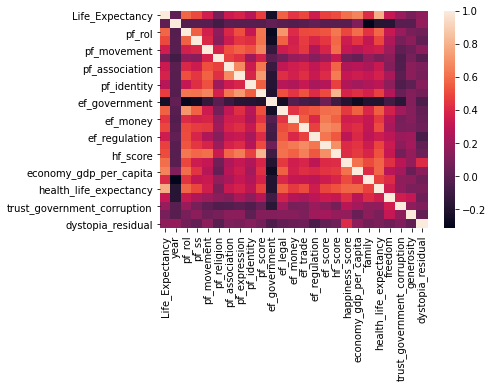

In [ ]:
# Plot the overall confusion matrix
import seaborn as sn
corrMatrix = changed_columns.corr(method="kendall")
sn.heatmap(corrMatrix)